In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/bigmart_data.csv')
data.dropna(how = 'any', inplace = True)
data["Visibility_Scaled"] = data["Item_Visibility"] * 100

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

In [5]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#dropping null
data.dropna(how = 'any', inplace = True)

In [7]:
data.shape

(4650, 12)

In [9]:
sales_by_outlet = data.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.mean()
sales_by_outlet

Outlet_Establishment_Year
1987    2298.995256
1997    2277.844267
1999    2348.354635
2004    2438.841866
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

In [10]:
sales_by_type = data.groupby('Item_Type').Item_MRP.mean()
sales_by_type

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Meat                     140.279344
Others                   137.640870
Seafood                  146.595782
Snack Foods              147.569955
Soft Drinks              130.910182
Starchy Foods            151.256747
Name: Item_MRP, dtype: float64

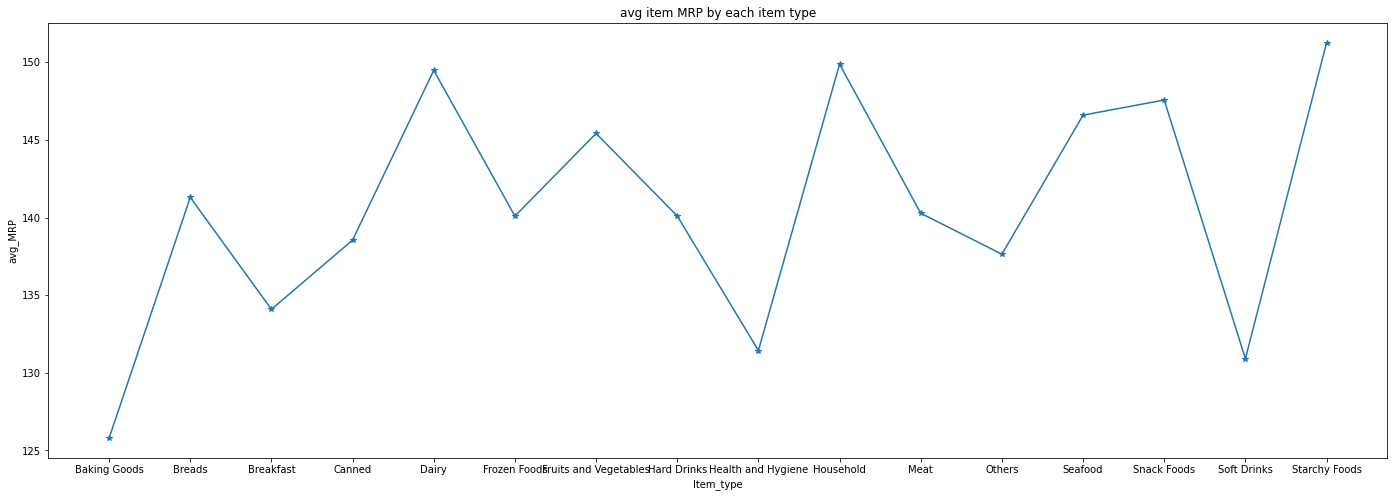

In [19]:
#converting index of sales_by_type df as x list
#converting values of sales_by_type df as y list
x = sales_by_type.index.tolist()
y = sales_by_type.values.tolist()
plt.figure(figsize = (24,8))

plt.title("avg item MRP by each item type")
plt.xlabel('Item_type')
plt.ylabel('avg_MRP')
plt.xticks(labels = x , ticks = np.arange(len(x)));
plt.plot(x,y, marker = '*')
#though for this kind of analysis bar chart will be more appropriate because we generally use line chart to see the trends

In [25]:
#making bar plot by mean item outlet sales for each outlet size
item_outlet_sales = data.groupby('Outlet_Size').Item_Outlet_Sales.mean()
item_outlet_sales
item_outlet_sales.sort_values(inplace = True)


In [26]:
item_outlet_sales

Outlet_Size
Medium    2172.116599
High      2298.995256
Small     2358.343066
Name: Item_Outlet_Sales, dtype: float64

<BarContainer object of 3 artists>

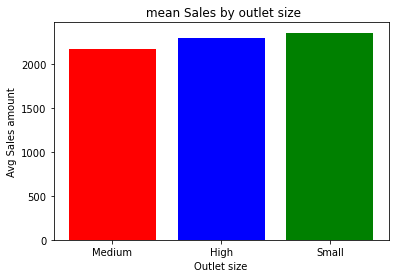

In [32]:
x = item_outlet_sales.index.tolist()
y = item_outlet_sales.values.tolist()

plt.title(' mean Sales by outlet size')
plt.xlabel('Outlet size')
plt.ylabel('Avg Sales amount')
plt.bar(x,y, color = ['red', 'blue', 'green'])
#small outlet's avg sales is better than large ond medium

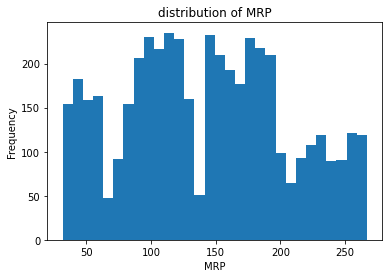

In [37]:
plt.title('distribution of MRP')
plt.xlabel('MRP')
plt.ylabel('Frequency')
plt.hist(data.Item_MRP, bins = 30);

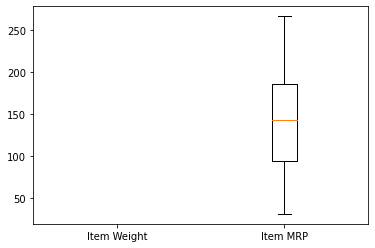

In [8]:
#boxplot
datab = data[['Item_Weight', 'Item_MRP']]
fig, ax = plt.subplots()
plt.boxplot(datab.values, labels = ['Item Weight', 'Item MRP']);

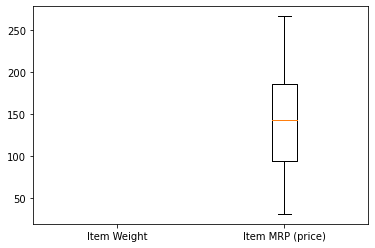

In [9]:
datac = data[['Item_Weight', 'Item_MRP']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# generate subplots

fig, ax = plt.subplots()
# make the boxplot
plt.boxplot(datac.values, labels=['Item Weight', 'Item MRP (price)'], flierprops=red_diamond);

In [3]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
datad = data[['Item_Outlet_Sales']]

Text(0.5, 1.0, 'sales by Outlet')

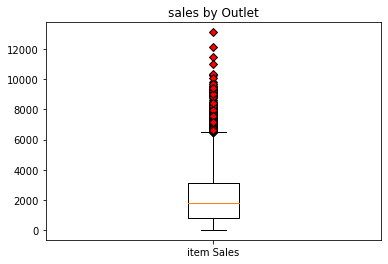

In [8]:
red_diamond = dict(markerfacecolor = 'r', marker = 'D')
plt.boxplot(datad.values, flierprops = red_diamond, labels = ['item Sales'])
plt.title('sales by Outlet')
#plt.xticks(ticks = 1,labels = 'Outlet Sales')

## violin plot

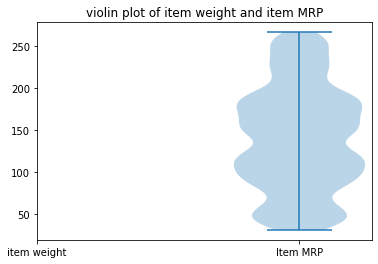

In [12]:
fig, ax = plt.subplots()
plt.violinplot(datac.values)
plt.title("violin plot of item weight and item MRP")
plt.xticks(ticks  = [1,2], labels = ['item weight', 'Item MRP']);


In [ ]:
plt.xticks()

In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
import seaborn as sns
sns.set()
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,10)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

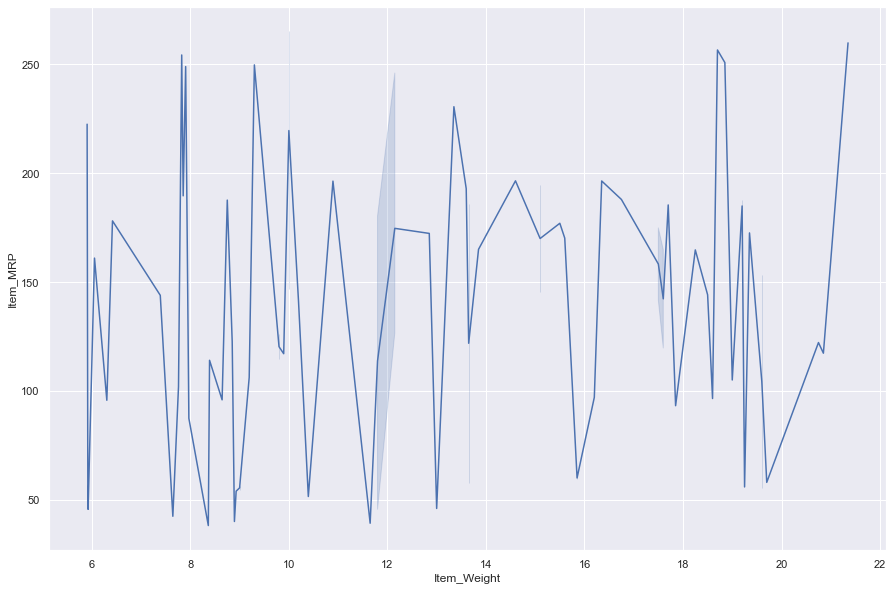

In [12]:
sns.lineplot(x = 'Item_Weight', y = 'Item_MRP', data = data[:100])

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

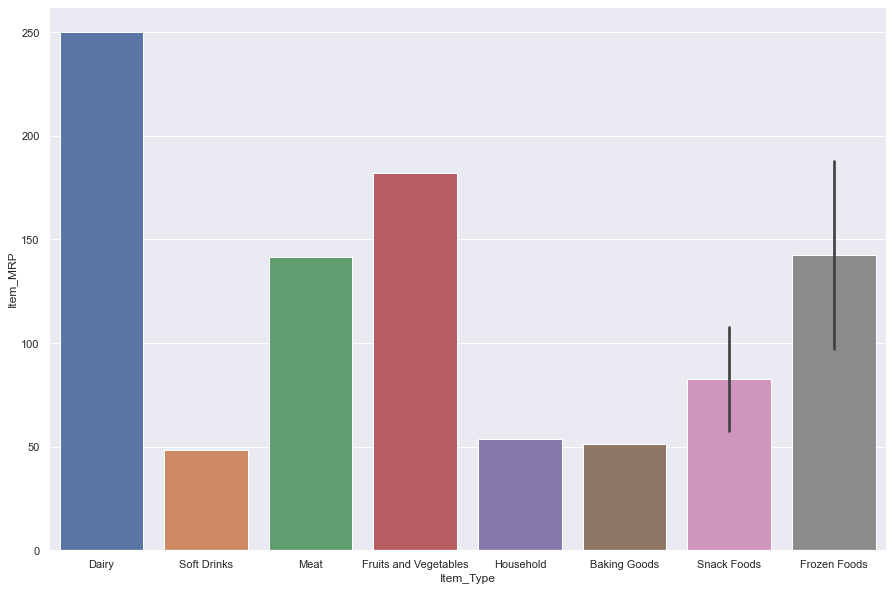

In [19]:
#barplot
sns.barplot(x = 'Item_Type', y = 'Item_MRP', data = data[:10])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

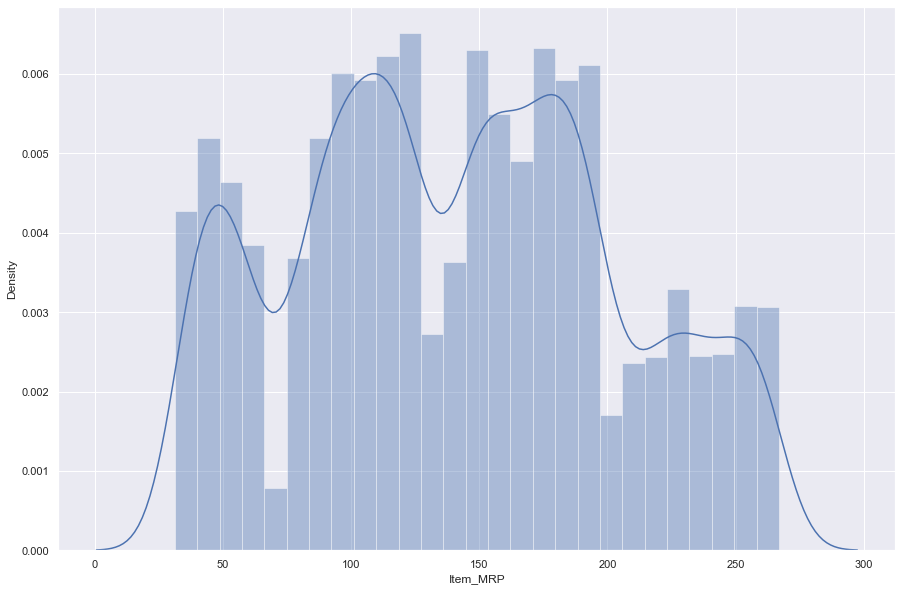

In [17]:
#histogram
sns.distplot(data['Item_MRP'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP'>

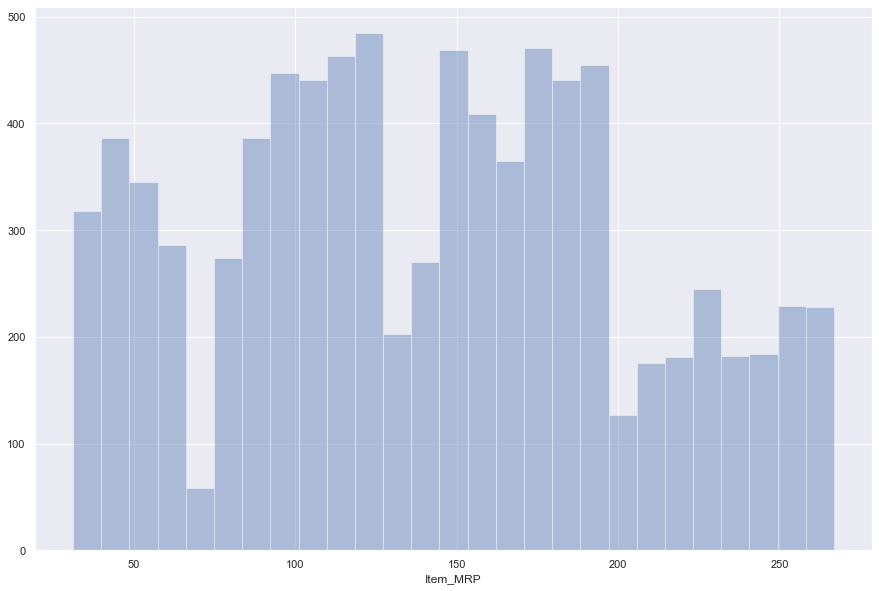

In [18]:
sns.distplot(data['Item_MRP'], kde = False)

In [20]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

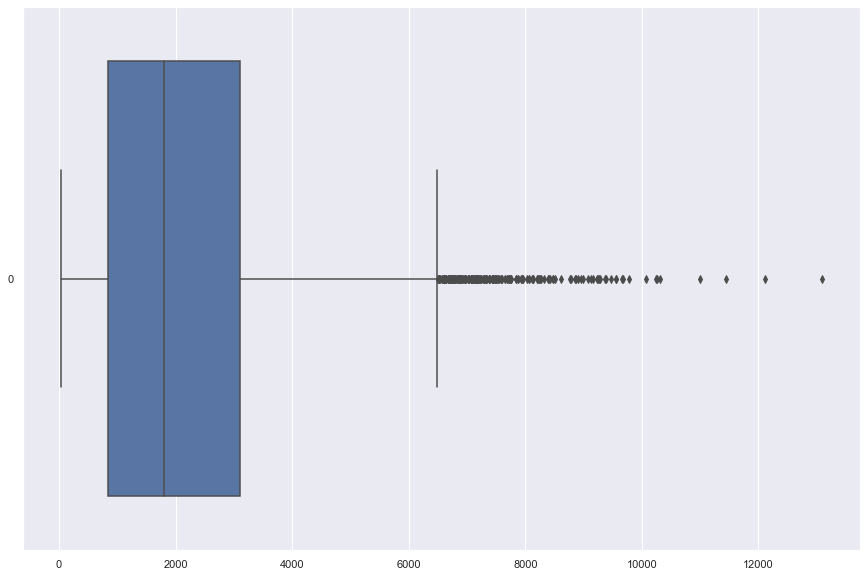

In [25]:
sns.boxplot(data = data['Item_Outlet_Sales'], orient = 'h')

Text(0.5, 0, 'Item outlet Sales')

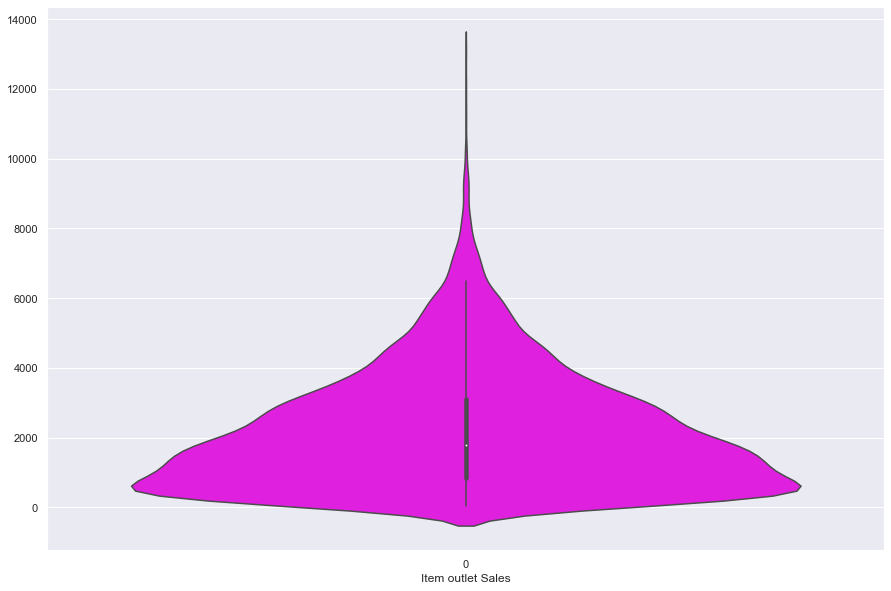

In [28]:
#voilin plot
sns.violinplot(data = data['Item_Outlet_Sales'], color = 'magenta', orient = 'vertical')
plt.xlabel('Item outlet Sales')

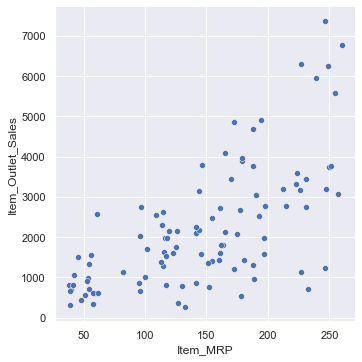

In [4]:
#bi - variate
#scatter plot using relpot
sns.relplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data[:100], kind = 'scatter')

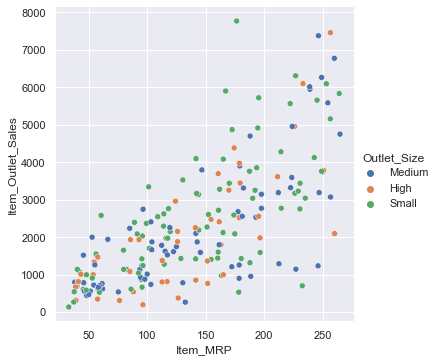

In [5]:
#putting 3 variables at a time
sns.relplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data[:200], hue = 'Outlet_Size')

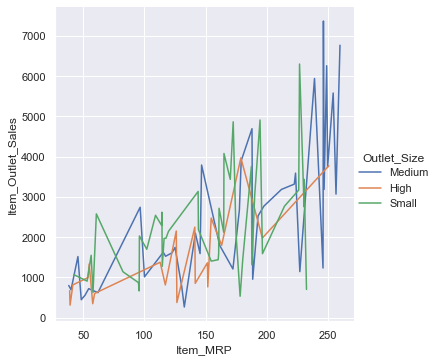

In [6]:
sns.relplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data[:100], kind = 'line', hue = 'Outlet_Size')

In [43]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Visibility_Scaled'],
      dtype='object')

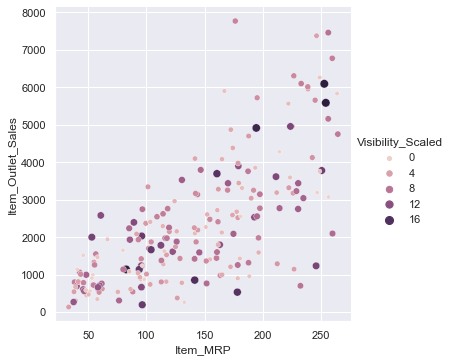

In [7]:
#bubble chart
sns.relplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data[:200], size = 'Visibility_Scaled', hue = 'Visibility_Scaled')

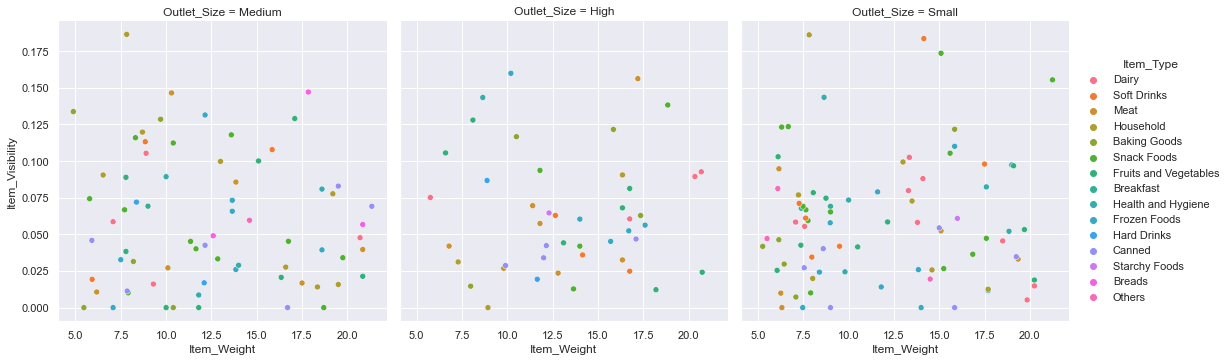

In [9]:
#multiple plots
sns.relplot(x = 'Item_Weight', y = 'Item_Visibility', data = data[:200], col = 'Outlet_Size', hue = 'Item_Type')

---

## `Advance categorical plots`

### strip plot --- item outlet sales and outlet size

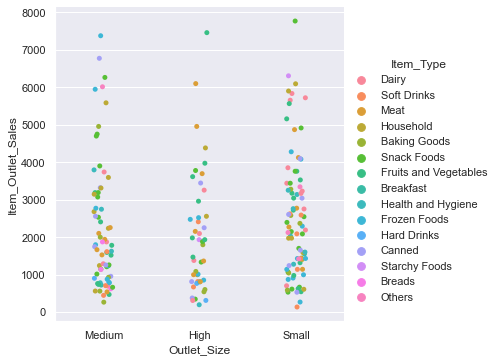

In [12]:
sns.catplot(x = 'Outlet_Size', y= 'Item_Outlet_Sales', data = data[:200], kind = 'strip', hue = 'Item_Type' )

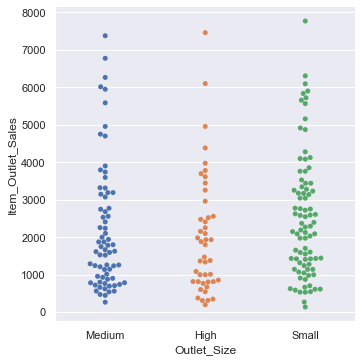

In [16]:
#swarm plot -item outlet sales and outlet_sales
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data[:200],  kind = 'swarm')

## categorical distribution plots

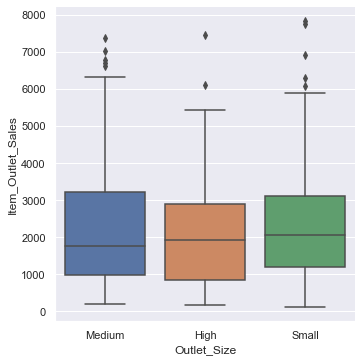

In [17]:
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data[:500], kind = 'box')

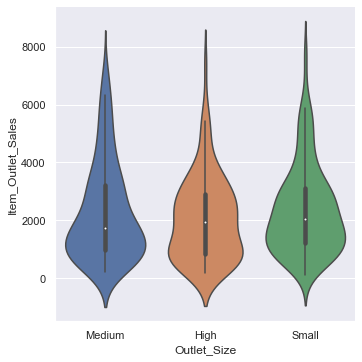

In [18]:
#violin plot category wise
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data[:500], kind = 'violin')

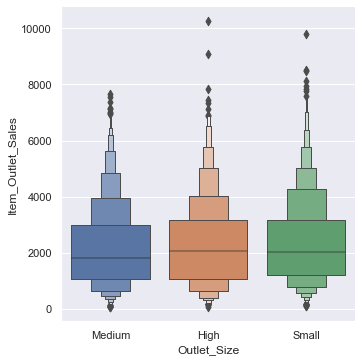

In [19]:
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data, kind = 'boxen')

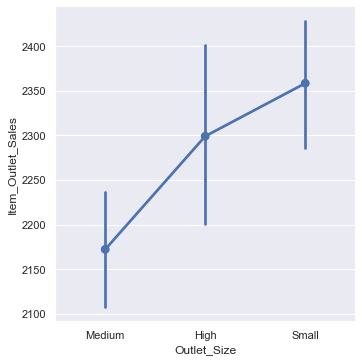

In [20]:
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data, kind = 'point')

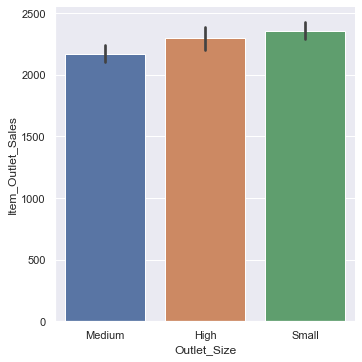

In [21]:
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data, kind = 'bar')

## Desnsity plots

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

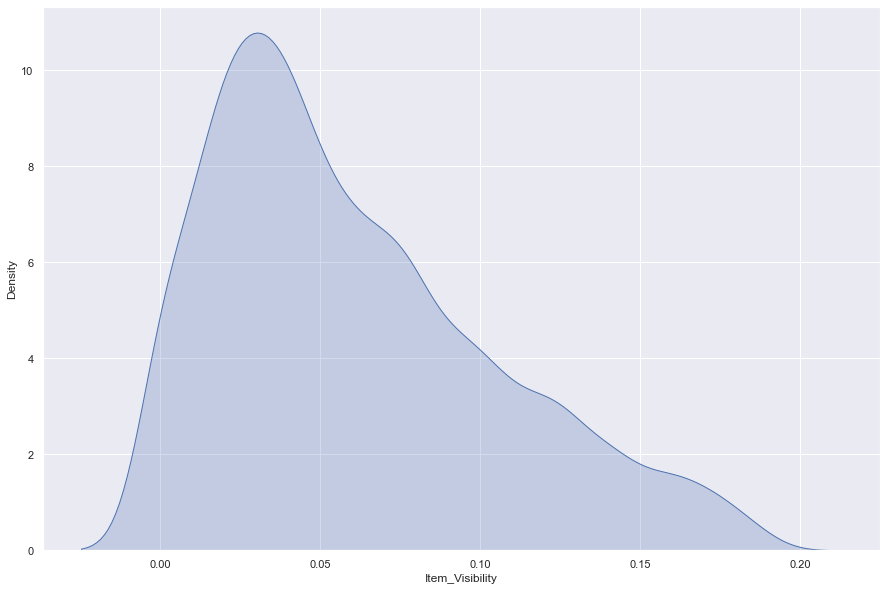

In [22]:
sns.kdeplot(data['Item_Visibility'], shade = True)

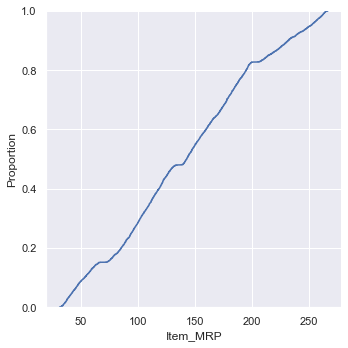

In [24]:
sns.displot(data['Item_MRP'], kind = 'ecdf')
#about 80% of the item has MRP less than 200

## pair plots

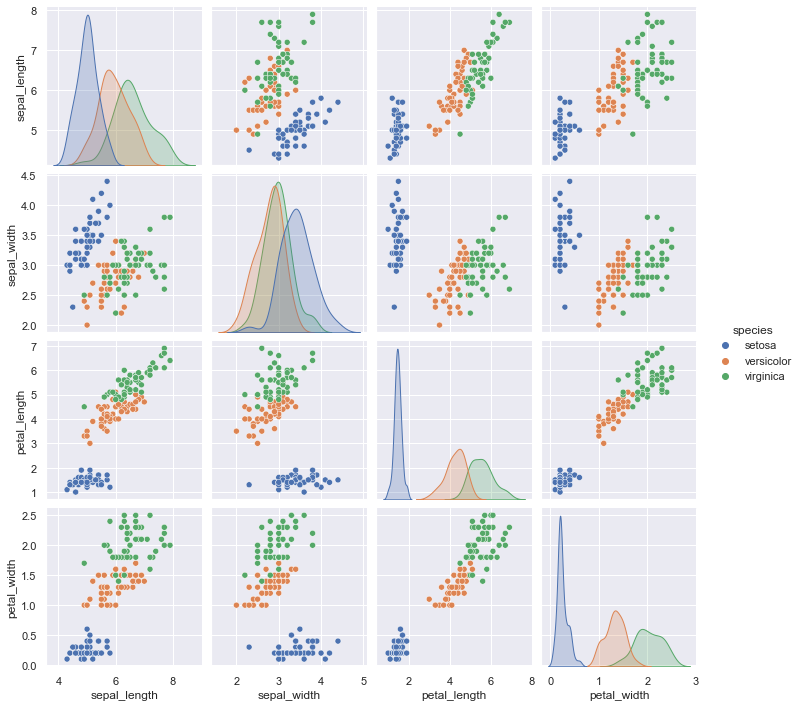

In [25]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue = 'species', height = 2.5)